In [ ]:
# https://www.kaggle.com/code/chandrimad31/clustering-with-pca-kmeans-hierarchical-dbscan/data

In [ ]:
import pandas as pd
data = pd.read_csv('/content/DBSCAN_results.csv')

In [ ]:
!pip install dabl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 558 kB 8.6 MB/s 


/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


Target looks like regression


[array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fad2c385a50>,
       dtype=object), None]

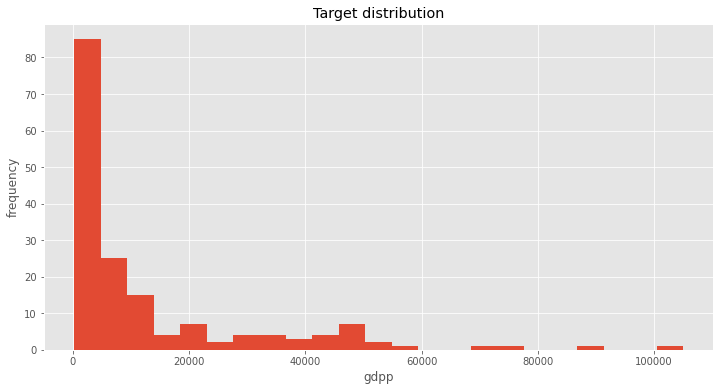

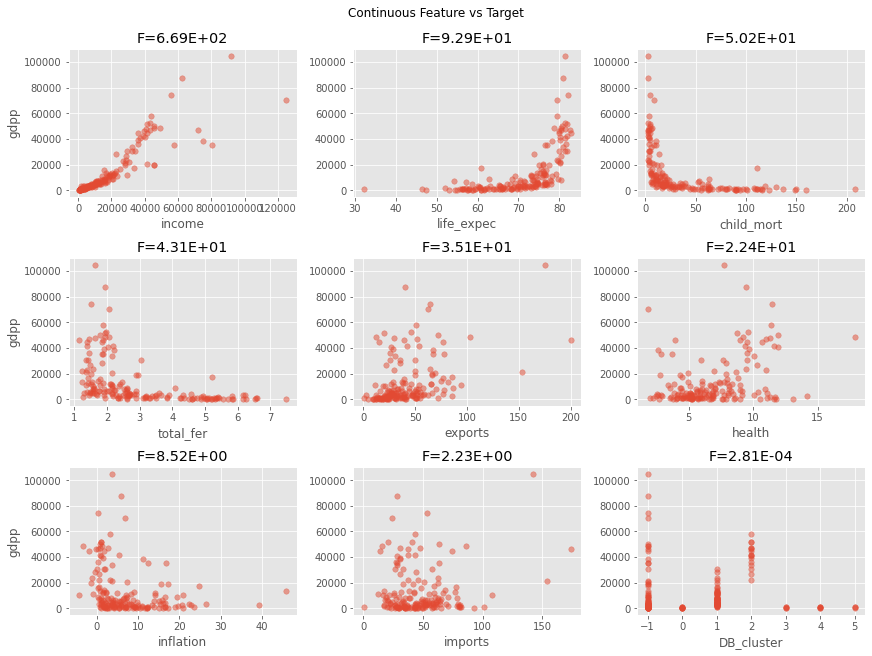

In [ ]:
import dabl
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)
dabl.plot(data, target_col = 'gdpp')

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data_scaled=sc.fit_transform(data)

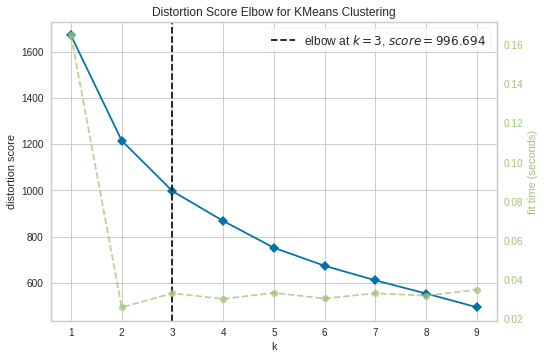

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(data_scaled)    
visualizer.poof()

In [ ]:
km_3=KMeans(n_clusters=3,random_state=12345)
km_3.fit(data_scaled)
print(km_3.cluster_centers_)

[[ 1.38209405 -0.44902617 -0.17115749 -0.1972886  -0.69747801  0.40850458
  -1.27706228  1.39559546 -0.60950969  0.0417642 ]
 [-0.40146615 -0.01777722 -0.22078503  0.0276558  -0.23374873 -0.01588956
   0.23830313 -0.42106853 -0.34552391 -0.09495257]
 [-0.83000679  0.63382985  0.7674502   0.19133932  1.49103941 -0.49784881
   1.09287988 -0.79958564  1.65007148  0.17842193]]


In [ ]:
print(km_3.labels_)

[0 1 1 0 1 1 1 2 2 1 1 1 1 1 1 2 1 0 1 1 1 1 1 2 1 0 0 1 0 2 1 0 0 1 1 1 0
 0 0 1 0 1 2 2 2 1 1 1 1 0 0 1 1 2 2 0 0 1 2 0 2 1 1 0 0 1 0 1 2 1 1 1 0 2
 2 2 1 2 1 1 0 0 2 1 0 1 1 0 0 1 1 2 1 0 0 1 1 0 2 0 1 1 1 1 1 1 0 1 0 1 2
 2 0 0 2 1 0 1 1 1 1 1 2 2 1 1 0 1 1 0 1 1 0 2 2 2 1 0 2 2 1 1 0 1 2 2 1 0
 1 0 0 1 1 1 1 0 1 2 2 2 1 1 1 1 1 0 0]


In [ ]:
pd.Series(km_3.labels_).value_counts()

1    86
0    46
2    35
dtype: int64

In [ ]:
from sklearn import metrics
metrics.silhouette_score(data_scaled, km_3.labels_)

0.2565529977791465

In [ ]:
k_range = range(2, 10)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=12345)
    km.fit(data_scaled)
    scores.append(metrics.silhouette_score(data_scaled, km.labels_))

In [ ]:
print(scores)


[0.2612067710711459, 0.2565529977791465, 0.26683931323476173, 0.2864403198300058, 0.28751563590350343, 0.23783477485102214, 0.24533708088096326, 0.22917879408380787]


In [ ]:
sse = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=12345).fit(data_scaled)
    if k == 4: labels = kmeans.labels_
    clusters = kmeans.labels_
    sse[k] = kmeans.inertia_ 

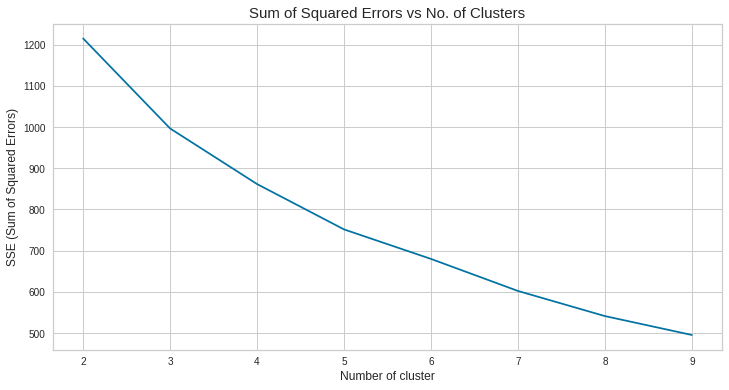

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster", fontsize=12)
plt.ylabel("SSE (Sum of Squared Errors)", fontsize=12)
plt.title("Sum of Squared Errors vs No. of Clusters", fontsize=15)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
slc = {}
for k in range(2, 10):
    slc[k] = silhouette_score(data_scaled,clusters)

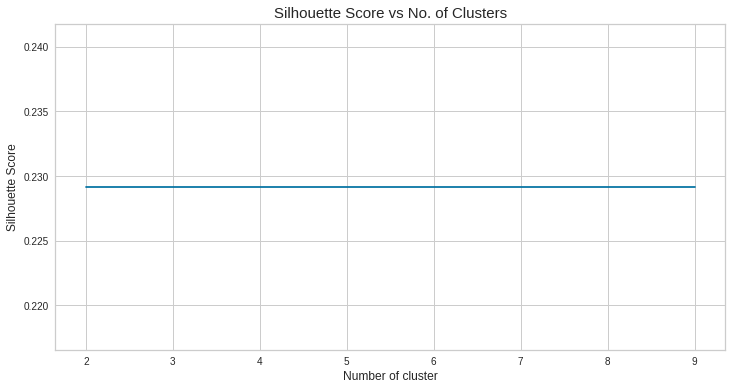

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(list(slc.keys()), list(slc.values()))
plt.xlabel("Number of cluster", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.title("Silhouette Score vs No. of Clusters", fontsize=15)
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.2612067710711459
For n_clusters = 3 The average silhouette_score is : 0.2565529977791465
For n_clusters = 4 The average silhouette_score is : 0.26683931323476173
For n_clusters = 5 The average silhouette_score is : 0.2864403198300058
For n_clusters = 6 The average silhouette_score is : 0.28751563590350343
For n_clusters = 7 The average silhouette_score is : 0.23783477485102214
For n_clusters = 8 The average silhouette_score is : 0.24533708088096326
For n_clusters = 9 The average silhouette_score is : 0.22917879408380787


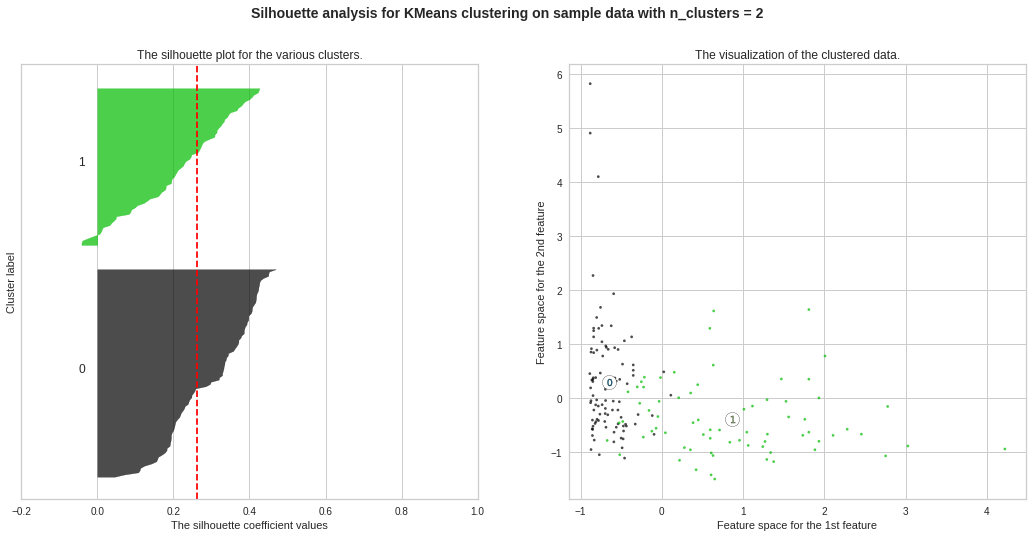

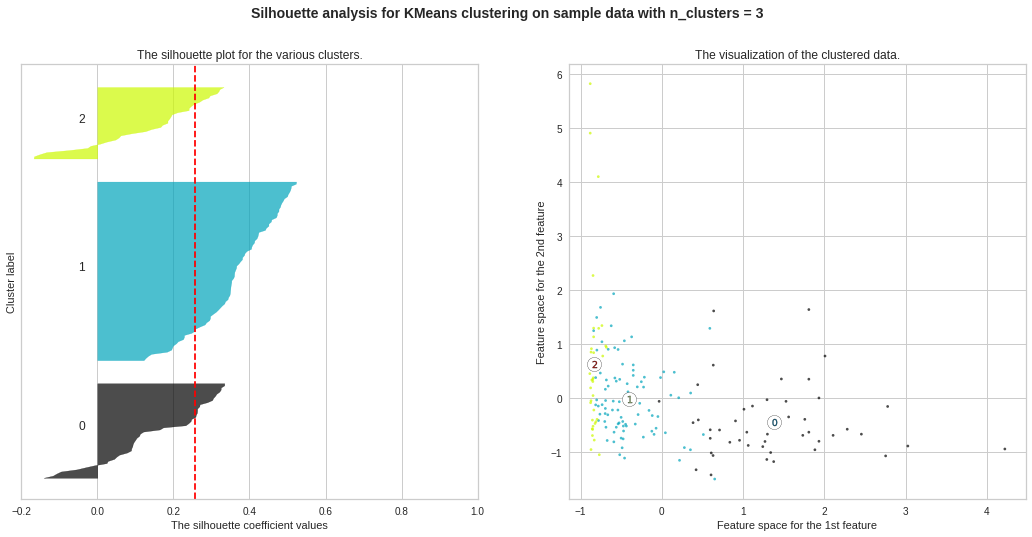

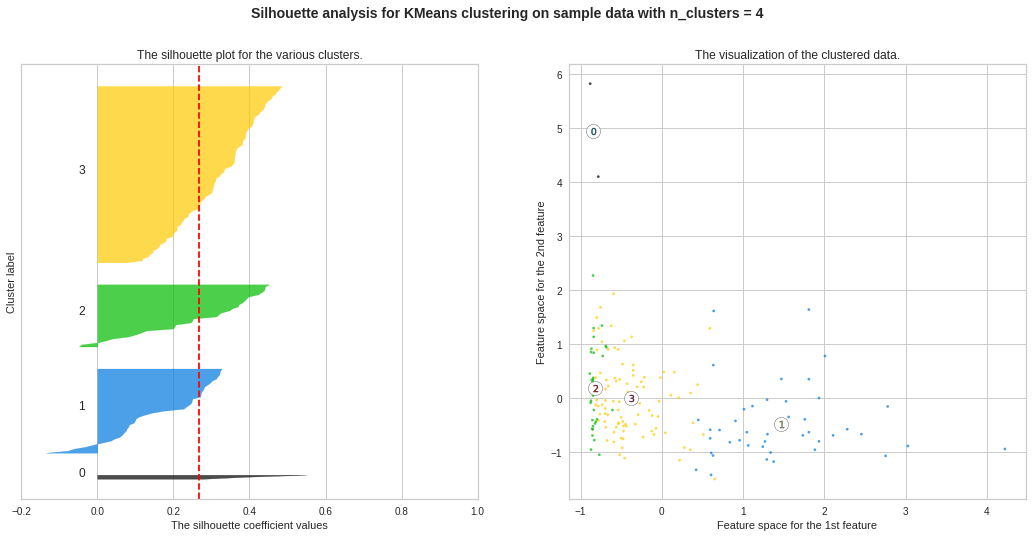

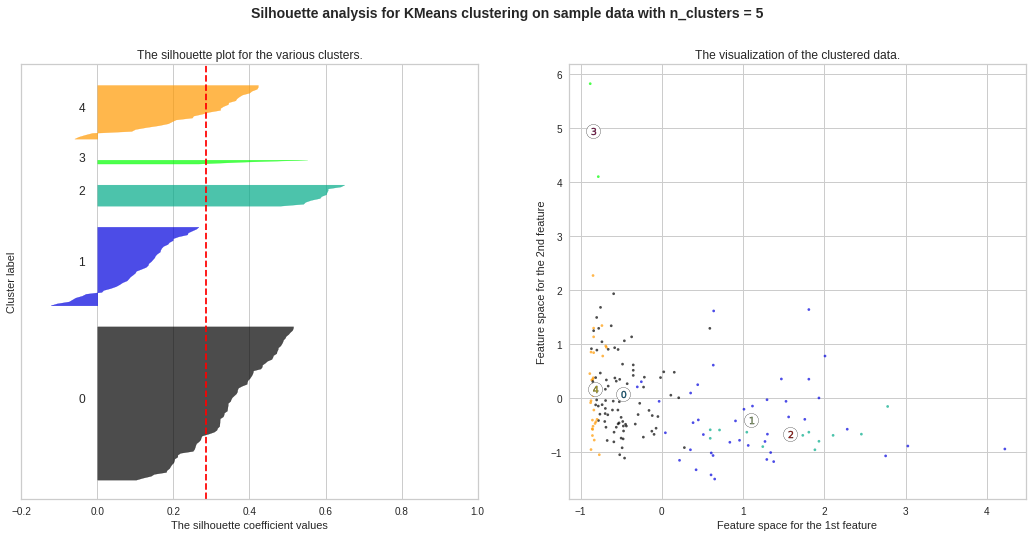

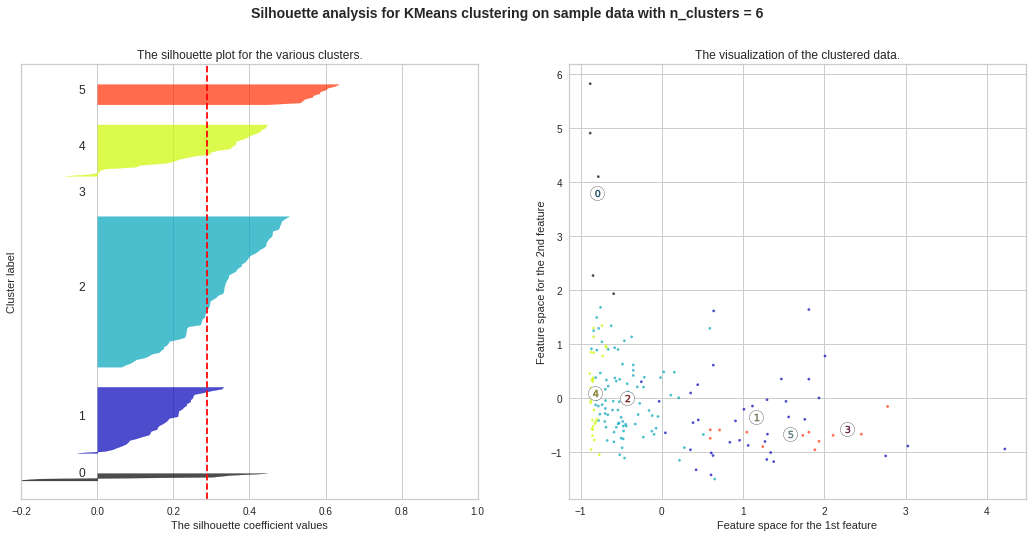

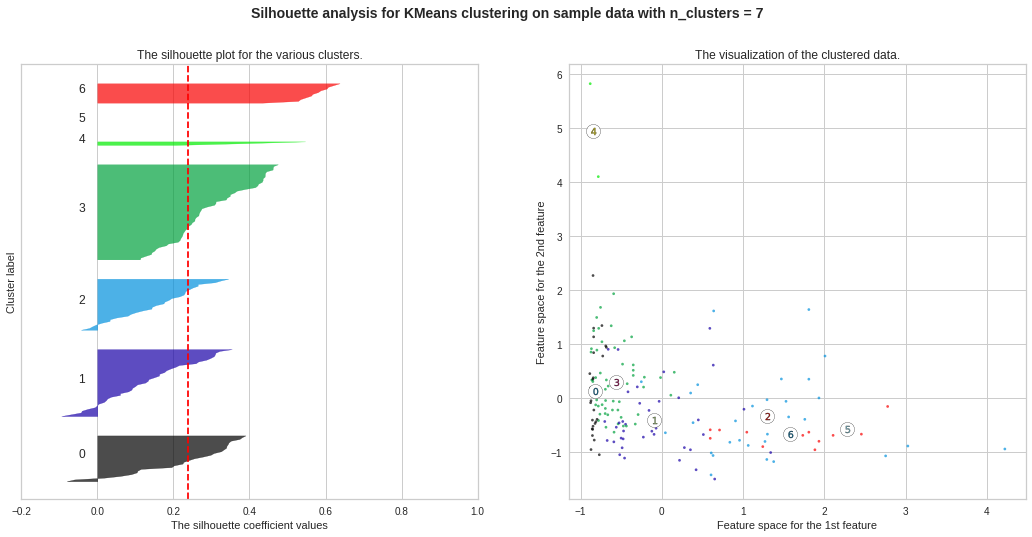

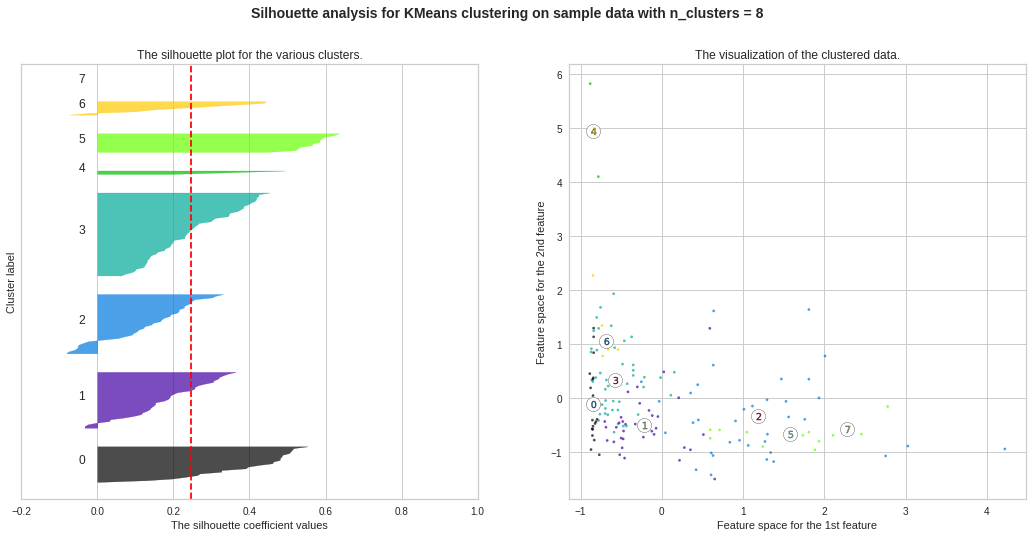

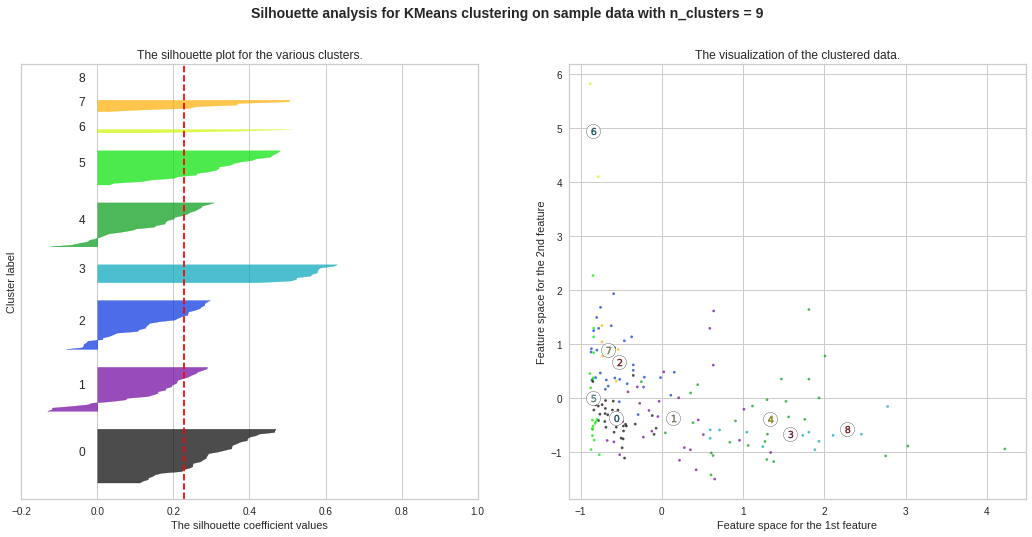

In [ ]:
#Silhouette Plots for Different No. of Clusters
import matplotlib.cm as cm
import numpy as np
for n_clusters in range(2, 10):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 8)
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but here the range is from -0.2 till 1
    ax1.set_xlim([-0.2, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_scaled) + (n_clusters + 1) * 10])
    # Initialize the clusterer with n_clusters value and a random generator seed of 12345 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,max_iter=1000, random_state=12345)
    cluster_labels = clusterer.fit_predict(data_scaled)
    # The silhouette_score gives the average value for all the samples
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_scaled, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data_scaled[:, 0], data_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters), fontsize=14, fontweight='bold')
